In [1]:
import cv2
import pandas as pd
import numpy  as np
import os
import matplotlib.pyplot as plt

F:\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
F:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#locating the folder where file will be saved
os.chdir(r'D:\deep_learning\material')

# Visualize the image

In [5]:
img = cv2.imread('logo.jpg', 1)
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

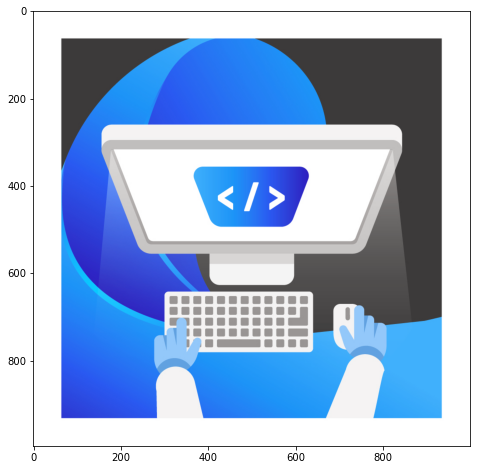

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(img)

# image information

In [7]:
print(f' Shape ={img.shape}')
print(f' height or row ={img.shape[0]}')
print(f' width or col ={img.shape[1]}')
print(f' channel ={img.shape[2]}')

 Shape =(995, 1000, 3)
 height or row =995
 width or col =1000
 channel =3


# ressize

In [8]:
img = cv2.resize(img,(40,40))
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

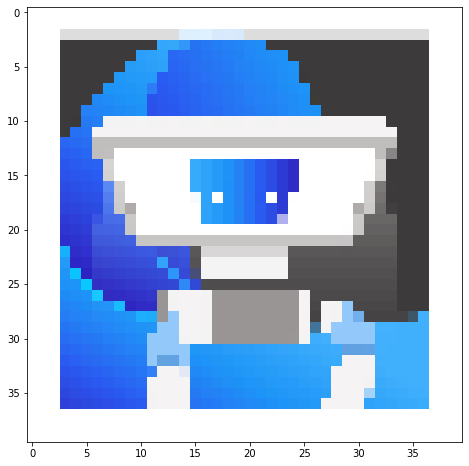

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(img)

# rotate

In [10]:
img = cv2.imread('logo.jpg', 1)
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

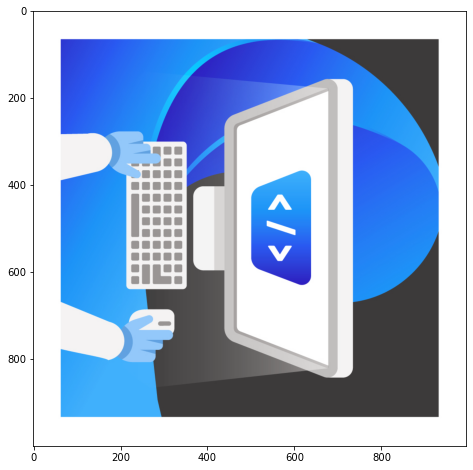

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(img)

#  Change first 100 rows to random pixels 


In [12]:
import cv2
import random

img = cv2.imread('logo.jpg', -1)

# Change first 100 rows to random pixels
for i in range(100):  #row
    for j in range(img.shape[1]):   #col
        img[i][j] = [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]  #(r,g,b)

cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

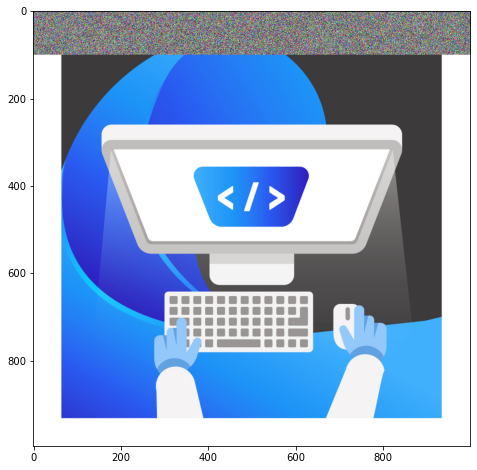

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(img)

# Copy part of image

In [14]:
img = cv2.imread('logo.jpg', -1)
tag = img[500:700, 600:900]
img[100:300, 650:950] = tag

cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

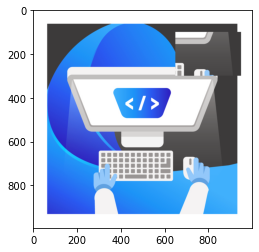

In [15]:
plt.imshow(img)

# Resize

In [19]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    width = int(cap.get(3))
    height = int(cap.get(4))

    image = np.zeros(frame.shape, np.uint8)
    smaller_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    image[:height//2, :width//2] = cv2.rotate(smaller_frame, cv2.ROTATE_180)
    image[height//2:, :width//2] = smaller_frame
    image[:height//2, width//2:] = cv2.rotate(smaller_frame,cv2.ROTATE_180)
    image[height//2:, width//2:] = smaller_frame

    cv2.imshow('frame', image)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [20]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    width = int(cap.get(3))
    height = int(cap.get(4))

    img = cv2.line(frame, (0, 0), (width, height), (255, 0, 0), 10)
    img = cv2.line(img, (0, height), (width, 0), (0, 255, 0), 5)
    img = cv2.rectangle(img, (100, 100), (200, 200), (128, 128, 128), 5)
    img = cv2.circle(img, (300, 300), 60, (0, 0, 255), -1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.putText(img, 'You are Great!', (10, height - 10), font, 2, (0, 0, 0), 5, cv2.LINE_AA)

    cv2.imshow('frame', img)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# color conversion 

In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    width = int(cap.get(3))
    height = int(cap.get(4))

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])

    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    result = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow('frame', result)
    cv2.imshow('mask', mask)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# corner detection

In [6]:
import numpy as np
import cv2

img = cv2.imread('chessboard.png')
img = cv2.resize(img, (0, 0), fx=0.75, fy=0.75)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 5, (255, 0, 0), -1)

for i in range(len(corners)):
    for j in range(i + 1, len(corners)):
        corner1 = tuple(corners[i][0])
        corner2 = tuple(corners[j][0])
        color = tuple(map(lambda x: int(x), np.random.randint(0, 255, size=3)))
        cv2.line(img, corner1, corner2, color, 1)

cv2.imshow('Frame', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

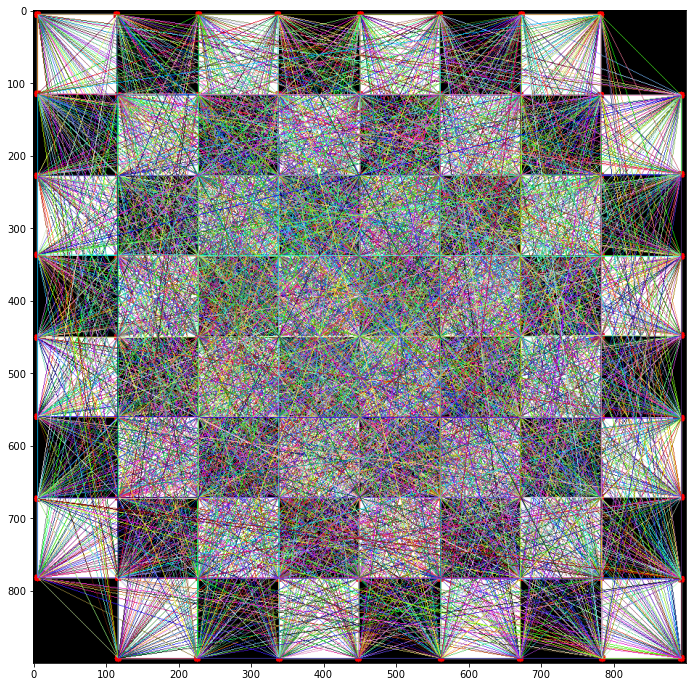

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(img)

# object detection 

In [3]:
import numpy as np
import cv2

img = cv2.resize(cv2.imread('soccer_practice.jpg', 0), (0, 0), fx=0.8, fy=0.8)
template = cv2.resize(cv2.imread('shoe.PNG', 0), (0, 0), fx=0.8, fy=0.8)
h, w = template.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

for method in methods:
    img2 = img.copy()

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)    
    cv2.rectangle(img2, location, bottom_right, 255, 5)
    cv2.imshow('Match', img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

while True:
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 5)
        roi_gray = gray[y:y+w, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 5)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()